In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Importing Libaries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error

# Loading Dataset

In [3]:
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')
test_ids = test_df['PassengerId']
train_df = train_df.drop(['PassengerId'], axis=1)
test_df = test_df.drop(['PassengerId'], axis=1)

In [4]:
if 'Survived' not in test_df.columns:
    test_df['Survived']=0

In [5]:
df = pd.concat([train_df, test_df], axis=0)

# Analyzing Dataset

In [6]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0


In [9]:
df.shape

(1309, 11)

In [10]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

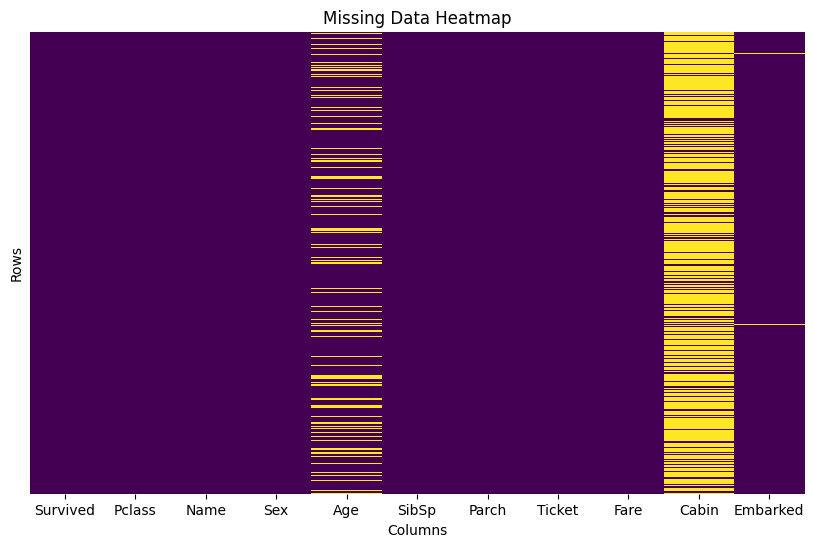

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check for missing values
missing_data = df.isnull()

# Plot the missing data
plt.figure(figsize=(10, 6))
sns.heatmap(missing_data, cbar=False, cmap="viridis", yticklabels=False)
plt.title("Missing Data Heatmap")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()

In [12]:
df.duplicated().sum()

0

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


# Data Preprocessing

## Handling NULL values

In [14]:
df = df.drop(["Ticket", "Name", "Cabin"], axis=1)

In [15]:
cols = ["SibSp", "Parch", "Fare", "Age"]

for col in cols:
    df[col].fillna(df[col].median(), inplace=True)
        
df.Embarked.fillna("U", inplace=True)

In [16]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


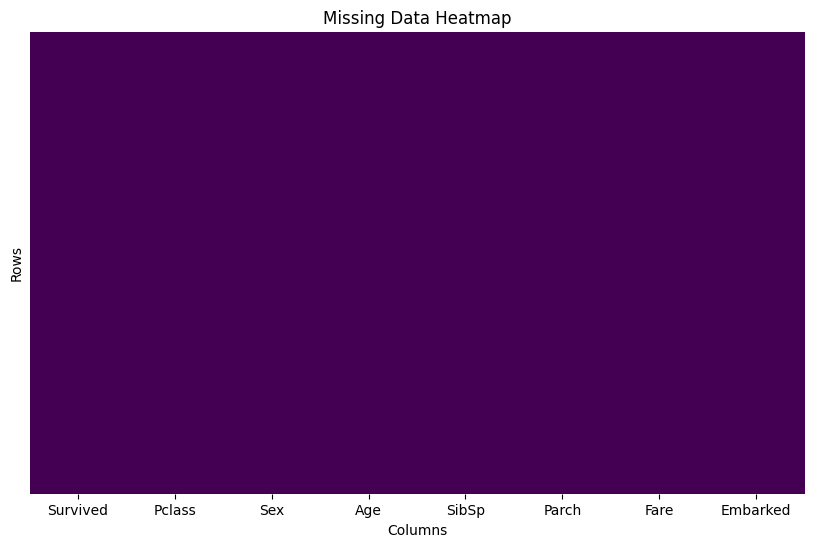

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check for missing values
missing_data = df.isnull()

# Plot the missing data
plt.figure(figsize=(10, 6))
sns.heatmap(missing_data, cbar=False, cmap="viridis", yticklabels=False)
plt.title("Missing Data Heatmap")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()

## Converting from categorical to numerical

In [18]:
le = preprocessing.LabelEncoder()
columns = ["Sex", "Embarked"]

for col in columns:
    df[col] = le.fit_transform(df[col])
    print(le.classes_)
      
df.head(5)

['female' 'male']
['C' 'Q' 'S' 'U']


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


## Splitting dataset

In [19]:
training_data = df[0:len(train_df)]
testing_data = df[len(train_df):]
testing_data = testing_data.drop(columns='Survived')

In [20]:
X = training_data.drop(columns='Survived')
y = training_data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train.shape, y_train.shape

((712, 7), (712,))

# Model Initialization and Training

## Logistic Regression

In [21]:
classifier = LogisticRegression(random_state=0, max_iter=1000).fit(X_train, y_train)

In [22]:
predictions = classifier.predict(X_test)
accuracy_score(y_test, predictions)

0.7318435754189944

## Linear Regression

In [23]:
classifier2 = LinearRegression().fit(X_train, y_train)
predictions2 = classifier2.predict(X_test)
mse = mean_squared_error(y_test, predictions2)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.18684476885222634


## Random Forest 

In [24]:
classifier_rf = RandomForestClassifier(random_state=0, n_estimators=100)
classifier_rf.fit(X_train, y_train)
predictions_rf = classifier_rf.predict(X_test)
accuracy = accuracy_score(y_test, predictions_rf)
print(f"Accuracy: {accuracy}")

Accuracy: 0.770949720670391


## SVM

In [25]:
from sklearn.svm import SVC
classifier_svc = SVC(kernel='rbf', C=1, random_state=0)
classifier_svc.fit(X_train, y_train)
predictions_svc = classifier_svc.predict(X_test)
accuracy_svc = accuracy_score(y_test, predictions_svc)
print(f"Accuracy: {accuracy_svc}")

Accuracy: 0.6312849162011173


## Submission

In [26]:
submission_pred = classifier_rf.predict(testing_data)
submission_df = pd.DataFrame({"PassengerId": test_ids.values,
                   "Survived": submission_pred,
                  })
submission_df.to_csv("submission.csv", index=False)